In [1]:
import pyspedas
import pytplot
from pytplot import tplot, options, tlimit, tplot_names
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
import datetime
import netCDF4
from netCDF4 import Dataset, num2date
import datetime as dt
from pytplot import get_data
import csv
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from dateutil.parser import isoparse as isotoutc
import arrow

In [2]:

filename = "/Users/sians/OneDrive/Desktop/LANL_2015/Data file/20150907_1991-080_10sec_flux.txt"


from dateutil.parser import isoparse as isotoutc

# Open the file in read mode
with open(filename, "r") as file:
    # Read the first 130 lines into a string array
    lanl_header = []
    for i in range(130):
        line = file.readline()
        lanl_header.append(line.strip())

    # Read the remaining data into a floating-point array
    data_array = []
    for line in file:
        values = line.strip().split()  # Split the line into individual values

        # Convert the ISO timestamp in the first column to Unix timestamp
        iso_timestamp = values[0]
      
        dt=arrow.get(iso_timestamp).datetime
        #print(dt.timestamp())
        
        # Replace the ISO timestamp with the Unix timestamp in the first column
        values[0] = dt.timestamp()

        # Convert the remaining values to float
        float_values = [float(x) for x in values[1:]]
        
        # Add the Unix timestamp and the float values to the float array
        data_array.append([dt] + float_values)

In [3]:
# Extract the first column
time = [row[0] for row in data_array] # first coulmn
# print(timefrac)
lat = [row[1] for row in data_array] #second column
long = [row[3] for row in data_array] #third column
radius = [row[4] for row in data_array] #fourth column
sopa_elec_flux= [row[5:15] for row in data_array] #5th to 14 coulmn-
# esp_elec_flux= [row[26:36] for row in data_array] #27 to end coulmn-
# sopa_elec_energy= [row[15:24] for row in data_array]
sopa_ion_flux= [row[15:22] for row in data_array] #15th to 26 coulmn-


# energyEflux1=[1122.5,1989.98,2437.21,3074.09,3968.63,5196.15,6841.05,9178.24,16692.5]

#converting time to datetime
time_new=[]
for i in range(0,len(time)):
    time_new= np.append(time_new, time[i])


In [4]:
time_new

array([datetime.datetime(2015, 9, 7, 0, 2, 3, 69000, tzinfo=tzutc()),
       datetime.datetime(2015, 9, 7, 0, 2, 13, 70000, tzinfo=tzutc()),
       datetime.datetime(2015, 9, 7, 0, 2, 23, 71000, tzinfo=tzutc()),
       ...,
       datetime.datetime(2015, 9, 7, 23, 59, 33, 72000, tzinfo=tzutc()),
       datetime.datetime(2015, 9, 7, 23, 59, 43, 64000, tzinfo=tzutc()),
       datetime.datetime(2015, 9, 7, 23, 59, 53, 72000, tzinfo=tzutc())],
      dtype=object)

14-Jun-23 20:34:54: C:\Users\sians\AppData\Local\Temp\ipykernel_14048\2928752308.py:23: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim([0, 1e7])



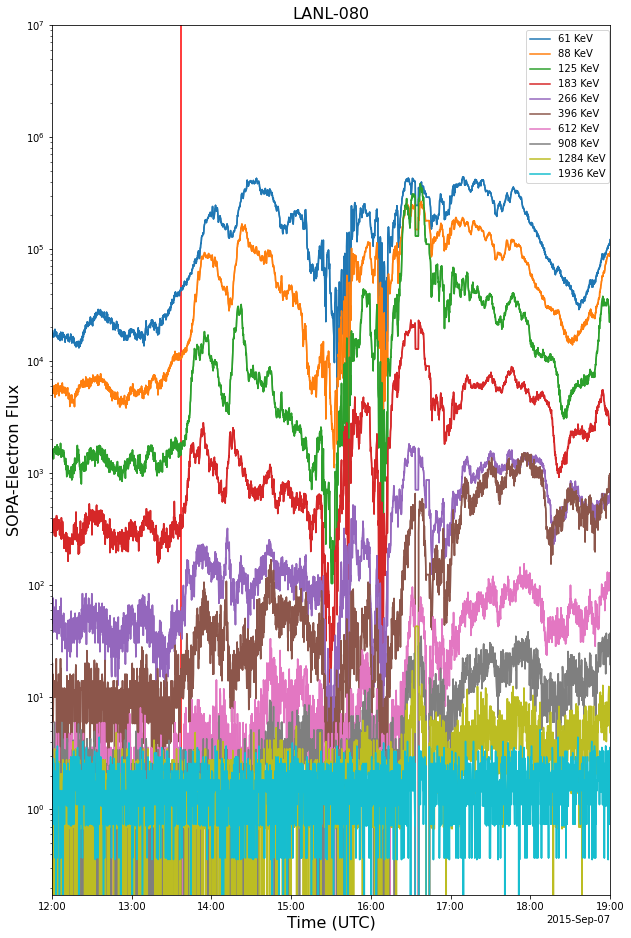

In [5]:
# Plots
import datetime as dt
# Create a plot with a single y-axis
fig, ax1 = plt.subplots(figsize=(10, 16))
ax1.semilogy(time_new, sopa_elec_flux)
# set limits on the x-axis
ax1.set_xlim(dt.datetime(2015, 9, 7, 12, 0, 0), dt.datetime(2015, 9, 7, 19, 0, 0))

line_date = dt.datetime(2015, 9, 7, 13, 37, 0)
# draw a vertical line at the line date
ax1.axvline(x=line_date, color='r')


####################################################
# line_date1 = dt.datetime(2015, 9, 7, 15, 20, 0)
# line_date2 = dt.datetime(2015, 9, 7, 15, 45, 0)

# ax1.axvline(x=line_date1, color='magenta')
# ax1.axvline(x=line_date2, color='magenta')
#####################################################

# ax1.set_xlim(start_date, end_date)
ax1.set_ylim([0, 1e7])
# ax1.axvline(x= line_date, color='r')

ax1.set_xlabel('Time (UTC)', fontsize=16)
ax1.set_ylabel('SOPA-Electron Flux', fontsize=16) #($cm^{-2}$$s^{-1}$$sr^{-1}$$eV^{-1}$)')

ax1.set_title('LANL-080', fontsize=16)

##[61.2373,88.7412,125.499,183.712,266.224,396.863,612.372,908.295,1284.52,1936.49]

ax1.plot(time_new,  sopa_elec_flux, label=['61 KeV', '88 KeV', '125 KeV', '183 KeV', '266 KeV', '396 KeV', '612 KeV', '908 KeV', '1284 KeV', '1936 KeV'])

# Add a legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(0.84, 1))

# Show the plot
plt.show()

# Add a legend to the plot
ax1.legend()


14-Jun-23 20:34:59: C:\Users\sians\AppData\Local\Temp\ipykernel_14048\2271852335.py:8: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax2.set_ylim([0, 1e6])



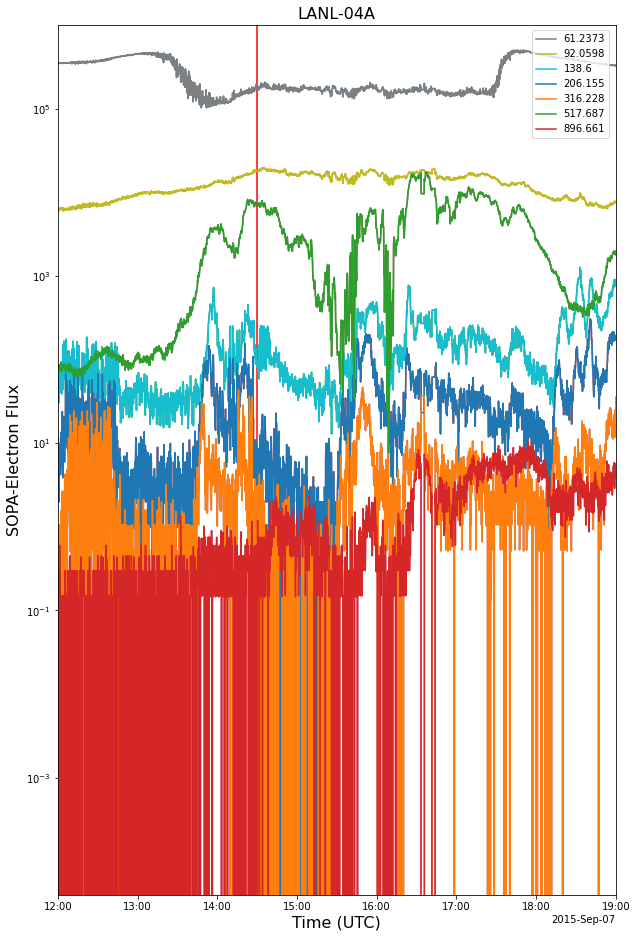

In [6]:
# Plots
# Create a plot with a single y-axis
import datetime as dt
fig, ax2 = plt.subplots(figsize=(10, 16))
ax2.semilogy(time_new, sopa_ion_flux)
# set limits on the x-axis
ax2.set_xlim(dt.datetime(2015, 9, 7, 12, 0, 0), dt.datetime(2015, 9, 7, 19, 0, 0))
ax2.set_ylim([0, 1e6])

line_date = dt.datetime(2015, 9, 7, 14, 30, 0)
# draw a vertical line at the line date
ax2.axvline(x=line_date, color='r')


####################################################
# line_date1 = dt.datetime(2015, 9, 7, 15, 20, 0)
# line_date2 = dt.datetime(2015, 9, 7, 15, 45, 0)

# ax1.axvline(x=line_date1, color='magenta')
# ax1.axvline(x=line_date2, color='magenta')
#####################################################

# ax1.set_xlim(start_date, end_date)

# ax1.axvline(x= line_date, color='r')

ax2.set_xlabel('Time (UTC)', fontsize=16)
ax2.set_ylabel('SOPA-Electron Flux', fontsize=16) #($cm^{-2}$$s^{-1}$$sr^{-1}$$eV^{-1}$)')
ax2.set_title('LANL-04A', fontsize=16)

##[61.2373,88.7412,125.499,183.712,266.224,396.863,612.372,908.295,1284.52,1936.49]

ax2.plot(time_new,  sopa_ion_flux, label=['61.2373','92.0598','138.6','206.155','316.228','517.687','896.661'])

# ax1.legend(loc='upper right')

# Add a legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(0.84, 1))

# Show the plot
plt.show()
# Add a legend to the plot
ax2.legend()


In [7]:
# # Create a plot with a single y-axis
# fig, ax2 = plt.subplots()
# ax2.semilogy(time_new, esp_elec_flux)
# # set limits on the x-axis
# ax2.set_xlim(dt.datetime(2015, 9, 7, 14, 0, 0), dt.datetime(2015, 9, 7, 18, 0, 0))

# line_date = dt.datetime(2015, 9, 7, 16, 7, 0)

# # draw a vertical line at the line date
# ax2.axvline(x=line_date, color='r')

# ####################################################
# line_date1 = dt.datetime(2015, 9, 7, 15, 20, 0)
# line_date2 = dt.datetime(2015, 9, 7, 15, 45, 0)

# ax2.axvline(x=line_date1, color='magenta')
# ax2.axvline(x=line_date2, color='magenta')
# #####################################################
# # ax1.set_xlim(start_date, end_date)
# # ax1.set_ylim([1e3, 1e7])
# # ax1.axvline(x= line_date, color='r')

# ax2.set_xlabel('Time')
# ax2.set_ylabel('ESP-Electron Flux($cm^{-2}$$s^{-1}$$sr^{-1}$$eV^{-1}$)')

# # Add a legend to the plot
# ax2.legend()

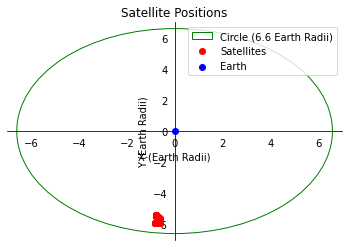

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Constants
earth_radius = 6371  # km

satellite_latitudes_deg = lat[:]  # List of satellite latitudes in degrees
satellite_longitudes_deg = long[:]  # List of satellite longitudes in degrees
satellite_radii = 6.619  # List of satellite radii from the Earth's center in earth radius


# Convert latitudes and longitudes from degrees to radians
satellite_latitudes_rad = np.deg2rad(satellite_latitudes_deg)
satellite_longitudes_rad = np.deg2rad(satellite_longitudes_deg)

# Calculate the Cartesian coordinates of the satellites in Earth radius units
x = 6 * np.cos(satellite_longitudes_rad) * np.cos(satellite_latitudes_rad)
y = 6 * np.sin(satellite_longitudes_rad) * np.cos(satellite_latitudes_rad)

# Create a 2D plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Plot the circle with a radius of 6.6 Earth radii
circle = plt.Circle((0, 0), 6.6, color='green', fill=False, label='Circle (6.6 Earth Radii)')
ax.add_patch(circle)

# Plot the satellite positions
plt.plot(x, y, 'ro', label='Satellites')

# Plot the Earth
plt.scatter(0, 0, color='blue', label='Earth')

# Set plot limits
plt.xlim(-7, 7)
plt.ylim(-7, 7)

# Set plot labels and title
plt.xlabel('X (Earth Radii)')
plt.ylabel('Y (Earth Radii)')
plt.title('Satellite Positions')

# Move the x and y axes to the center
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Hide the ticks
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=0)

# Add legend
plt.legend()

# Show the plot
plt.show()
